In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

## Hard Margin SVM

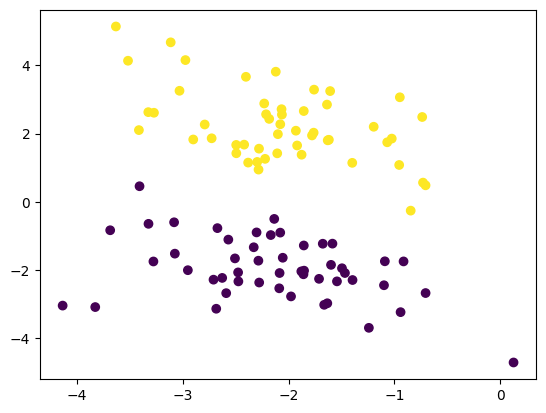

In [ ]:
# X,y = make_circles(n_samples=500, noise=0.09,factor = 0.5 , random_state=42)
X,y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1,hypercube = True,class_sep = 2 ,shuffle=True)
plt.scatter(X[:,0], X[:,1] , c=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
class SVM:
  def __init__(self, lr = 0.1, epoch = 100, lamda  = 0.01 , C = None):
    self.w = None
    self.b = None
    self.lr = lr
    self.epoch = epoch
    self.lamda = lamda
    self.C = C

  def fit(self, X, y):
    n_samples, n_features = X.shape
    y = np.where(y <= 0, -1, 1)
    self.w = np.zeros(n_features)
    self.b = 0

    if self.C == None:
      for _ in range(self.epoch):
        for id,x in enumerate(X):
          condition = y[id] * (np.dot(x, self.w) - self.b) >= 1
          if condition:
            self.w -= self.lr * (self.lamda *self.w)
          else:
            self.w -= self.lr * (self.lamda* self.w - np.dot(x, y[id]))
            self.b -= self.lr * y[id]
    # else:
    #   for _ in range(self.epoch):
    #     for id,x in enumerate(X):


    print(self.w, self.b)

  def predict(self, X_test):
    y_pred = []
    for x in X_test:
      result = np.dot(x, self.w) - self.b
      y_pred.append(np.sign(result))
    y_pred =  np.array(y_pred)
    y_pred = np.where(y_pred == -1, 0, 1)
    return y_pred

In [ ]:
md = SVM(lr=0.1, epoch=100, lamda = .001)
md.fit(X_train,y_train)
y_pred = md.predict(X_test)
print(accuracy_score(y_pred, y_test))

[ 0.1933387  -3.45469028] -1.5000000000000002
1.0


In [ ]:
def plot_svm(clf):
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()

1
[0.40986981 1.51691638] -0.20000000000000004
1.0


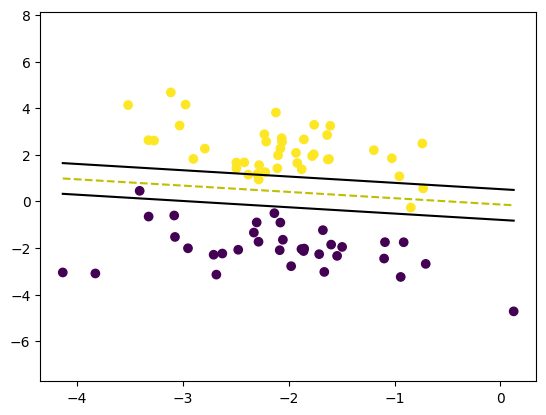

5
[0.93230892 1.87095842] -0.6
1.0


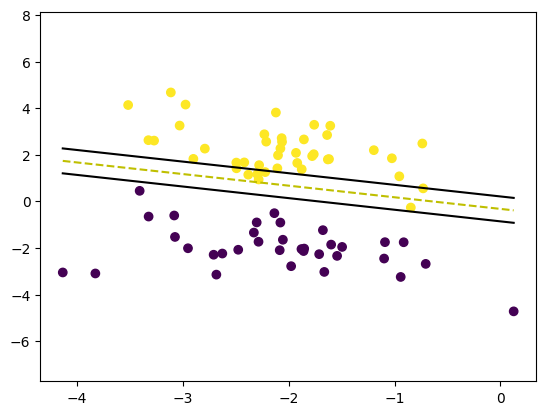

10
[1.04834015 2.0180615 ] -1.0999999999999999
1.0


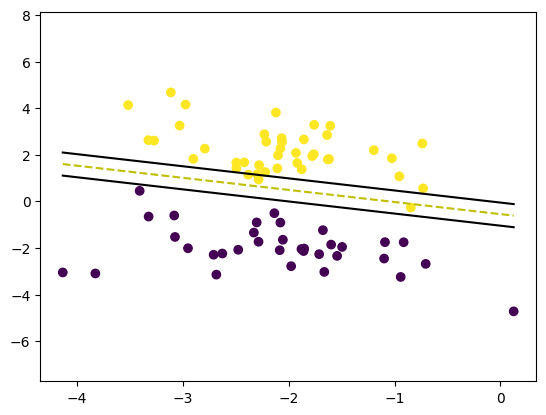

15
[1.29935243 1.98072702] -1.5000000000000002
1.0


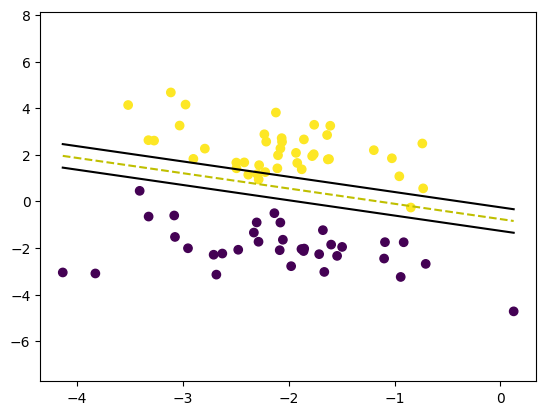

20
[1.42374287 2.10698401] -2.0000000000000004
1.0


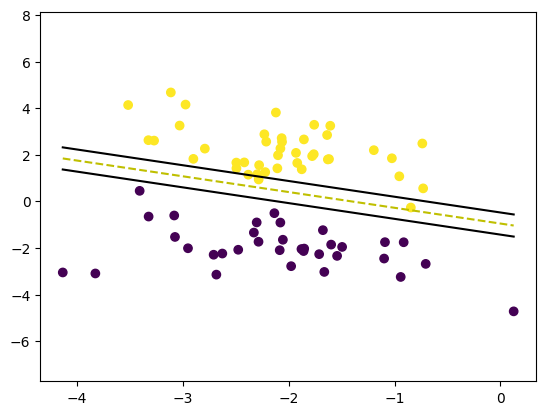

25
[1.56105066 2.02085641] -2.400000000000001
1.0


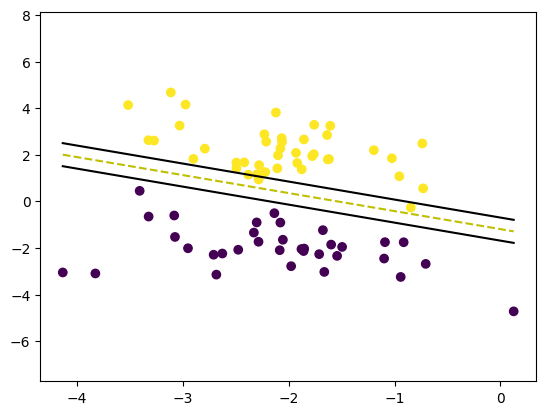

50
[1.46378802 1.97490915] -2.9000000000000012
1.0


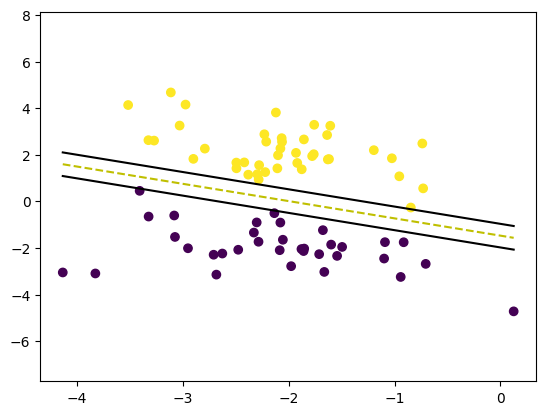

100
[1.40991219 1.90222111] -2.9000000000000012
1.0


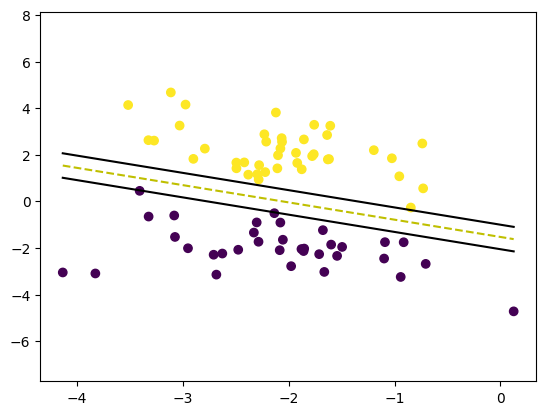

500
[1.44373045 1.63222413] -2.9000000000000012
1.0


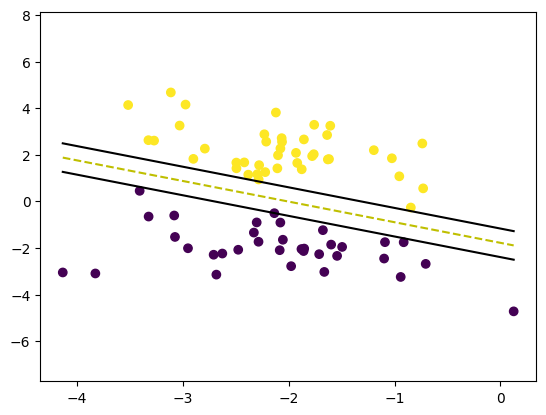

In [ ]:

for i in [1,5,10,15,20,25,50,100,500]:
  md = SVM(lr=0.1, epoch=i, lamda = .0001)
  print(i)
  md.fit(X_train,y_train)
  y_pred = md.predict(X_test)
  print(accuracy_score(y_pred, y_test))
  plot_svm(md)

## Soft Margin SVM